In [12]:
import torch
from torch import nn
from d2l import torch as d2l
import torchvision
from torchvision import transforms
from torch.utils import data

batch_size = 256

def get_dataloader_workers():
    """使用四个进程来读取数据。"""
    return 4

def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root='./data', train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root='./data', train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [13]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True))
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [14]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [15]:
def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(X @ W1 + b1)
    return (H @ W2 + b2)

loss = nn.CrossEntropyLoss(reduction='none')

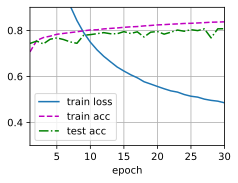

In [16]:
num_epochs, lr = 30, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)